# Descriptives (using the csv file) - Bikes - Final

In [1]:
import json
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#get the csv

In [3]:
df_clean_data = pd.read_csv(r'C:\Users\Maren\Desktop\TechLabs\hh_techlabs_group12\hh_techlabs_group12\clean_data_bikes_new.csv')

In [4]:
df_clean_data

,@iot.id,phenomenonDate,result,id,lat,long,weekday
0,45943231,2020-12-23,1197,11834,53.575722,10.036556,Wednesday
1,46123566,2020-12-24,472,11834,53.575722,10.036556,Thursday
2,46306429,2020-12-25,490,11834,53.575722,10.036556,Friday
3,46482553,2020-12-26,410,11834,53.575722,10.036556,Saturday
4,46654277,2020-12-27,321,11834,53.575722,10.036556,Sunday
...,...,...,...,...,...,...,...
46027,207515356,2021-07-31,615,11830,53.580531,9.999549,Saturday
46028,208609441,2021-08-01,754,11830,53.580531,9.999549,Sunday
46029,210227727,2021-08-02,1788,11830,53.580531,9.999549,Monday
46030,211940543,2021-08-03,2270,11830,53.580531,9.999549,Tuesday


In [5]:
df_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46032 entries, 0 to 46031
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   @iot.id         46032 non-null  int64  
 1   phenomenonDate  46032 non-null  object 
 2   result          46032 non-null  int64  
 3   id              46032 non-null  int64  
 4   lat             46032 non-null  float64
 5   long            46032 non-null  float64
 6   weekday         46032 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 2.5+ MB


In [6]:
df_clean_data.dtypes

@iot.id             int64
phenomenonDate     object
result              int64
id                  int64
lat               float64
long              float64
weekday            object
dtype: object

In [7]:
#  I would like to change phenomenonDate back to the format datetime64 (this got lost when saving the file as csv)

In [8]:
df_clean_data=df_clean_data.astype({'phenomenonDate': 'datetime64'})

In [9]:
df_clean_data.dtypes

@iot.id                    int64
phenomenonDate    datetime64[ns]
result                     int64
id                         int64
lat                      float64
long                     float64
weekday                   object
dtype: object

In [10]:
#min/max values

df_clean_data.max()

@iot.id                     243078851
phenomenonDate    2021-08-27 00:00:00
result                          13051
id                              14900
lat                           53.6567
long                          10.2077
weekday                     Wednesday
dtype: object

In [11]:
df_clean_data.min()

@iot.id                      39365554
phenomenonDate    2020-01-01 00:00:00
result                              0
id                              11798
lat                           53.4564
long                          9.81233
weekday                        Friday
dtype: object

In [12]:
df_clean_data.loc[df_clean_data["result"]==0]

,@iot.id,phenomenonDate,result,id,lat,long,weekday
613,39376108,2020-03-10,0,12142,53.575800,10.036414,Tuesday
2051,72380929,2021-04-20,0,12560,53.571353,9.868921,Tuesday
2052,72596787,2021-04-21,0,12560,53.571353,9.868921,Wednesday
2053,72812437,2021-04-22,0,12560,53.571353,9.868921,Thursday
2060,74323830,2021-04-29,0,12560,53.571353,9.868921,Thursday
...,...,...,...,...,...,...,...
44961,39369619,2020-01-27,0,11850,53.491647,10.018791,Monday
44962,39369735,2020-01-28,0,11850,53.491647,10.018791,Tuesday
44963,39370257,2020-02-01,0,11850,53.491647,10.018791,Saturday
44965,39370049,2020-01-30,0,11850,53.491647,10.018791,Thursday


In [13]:
#drop all observations which have 0 as result
df_clean_data=df_clean_data[df_clean_data.result!=0]

In [14]:
### --> range of dates: From 2020-01-01 to  2021-08-25 the vehicles are counted

In [15]:
# How many Zählstellen are measuring every day? 

## pivot: count numbers of Zählstellen("id") per phenomenondate
CountZaehlstelle = df_clean_data.pivot_table(values = "id", index = "phenomenonDate", aggfunc= "count")
CountZaehlstelle

,id
phenomenonDate,
2020-01-01,8
2020-01-02,10
2020-01-03,11
2020-01-04,10
2020-01-05,10
...,...
2021-08-23,115
2021-08-24,115
2021-08-25,114


<AxesSubplot:xlabel='phenomenonDate', ylabel='id'>

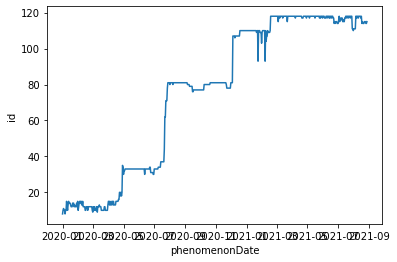

In [16]:
sns.lineplot(data=CountZaehlstelle, x = "phenomenonDate", y = "id")

In [17]:
# Combined number of bikes measured each individual day
SumBikes = df_clean_data.pivot_table(values = "result", index = "phenomenonDate", aggfunc = "sum")
SumBikes

,result
phenomenonDate,
2020-01-01,1080
2020-01-02,3153
2020-01-03,3022
2020-01-04,2039
2020-01-05,1906
...,...
2021-08-23,209427
2021-08-24,227267
2021-08-25,167176


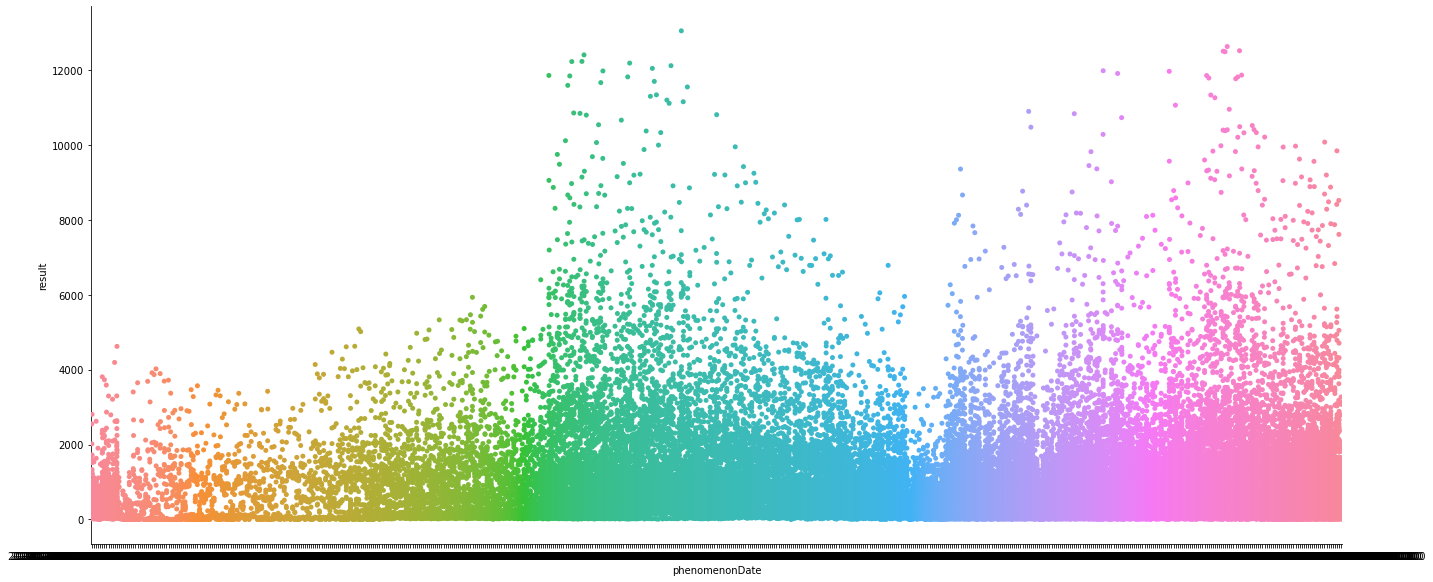

In [18]:
# How much traffic is there for every Zählstelle every day?
sns.catplot(x="phenomenonDate", y="result", data = df_clean_data, height=8, aspect=2.5)

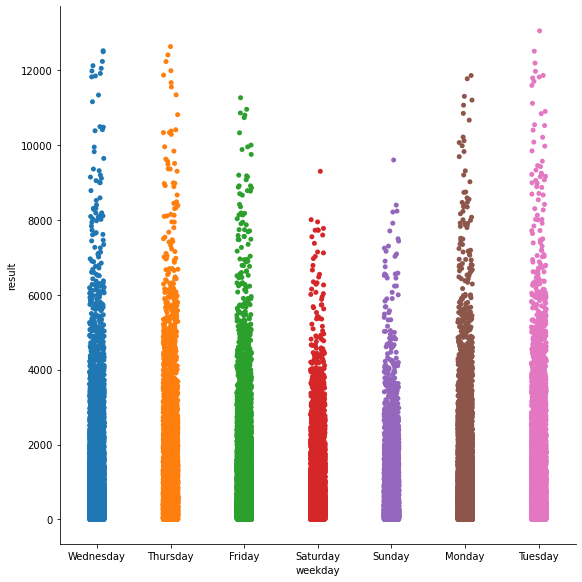

In [19]:
# How much traffic is there for every Zählstelle every day?/ measured per weekday
sns.catplot(x="weekday", y="result", data = df_clean_data, height=8)

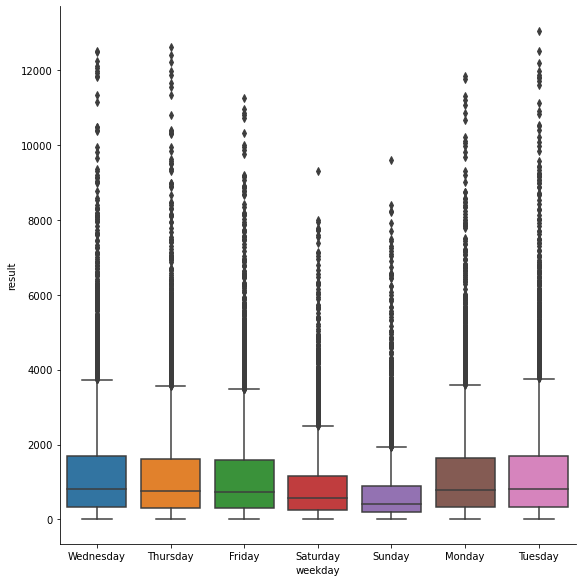

In [20]:
# Another way for visualiszation is using a boxplot. 
sns.catplot(x="weekday", y="result", kind="box", data=df_clean_data, height = 8)

In [21]:
# Calculating the average of each weekday
df_clean_data_mean=df_clean_data.groupby(['weekday']).mean()



In [22]:
df_clean_data_mean

,@iot.id,result,id,lat,long
weekday,,,,,
Friday,8.432026e+07,1178.081036,12334.831869,53.560361,10.009976
Monday,8.290005e+07,1204.765331,12332.161325,53.560402,10.009808
Saturday,8.217245e+07,870.997359,12331.689189,53.560430,10.009821
Sunday,8.237898e+07,703.007722,12331.486023,53.560211,10.009887
Thursday,8.388477e+07,1216.767849,12332.819912,53.560284,10.010173
Tuesday,8.320400e+07,1282.890683,12331.824877,53.560439,10.009953
Wednesday,8.336428e+07,1263.764831,12333.565350,53.560309,10.010122


In [23]:
df_clean_data_mean.reset_index(level=0, inplace=True)

In [24]:
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]

<AxesSubplot:xlabel='weekday', ylabel='result'>

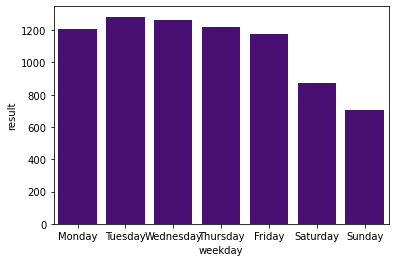

In [26]:
sns.barplot(x="weekday", y="result", data=df_clean_data_mean, order=order, color = 'indigo')

In [27]:
# Convert single digit weeknumbers to 2-digit weeknumbers (e.g "5" to "05")
# Weeknumbers

df_clean_data["Weeknumber"] = df_clean_data["phenomenonDate"].apply(lambda x: x.isocalendar()[1])
df_clean_data["yearnumber"] = df_clean_data["phenomenonDate"].apply(lambda x: x.isocalendar()[0])

In [28]:
def convert_weekno(num_weeknumber):
    if len(str(num_weeknumber)) == 1:
        Weeknumber_clean = '0'+str(num_weeknumber)
    else:
        Weeknumber_clean = str(num_weeknumber)
    return(Weeknumber_clean)

df_clean_data["Weeknumberstring"] = df_clean_data["Weeknumber"].apply(lambda x: convert_weekno(x))

In [29]:
df_clean_data["yearnumber"]=df_clean_data["yearnumber"].astype(object)

In [30]:
# Combine year + weeknumber
df_clean_data["Week in year"] = df_clean_data["yearnumber"].map(str)+df_clean_data["Weeknumberstring"].map(str)

In [31]:
df_clean_data["Week in year"]

0        202052
1        202052
2        202052
3        202052
4        202052
          ...  
46027    202130
46028    202130
46029    202131
46030    202131
46031    202131
Name: Week in year, Length: 45635, dtype: object

In [32]:
df_clean_data.dtypes

@iot.id                      int64
phenomenonDate      datetime64[ns]
result                       int64
id                           int64
lat                        float64
long                       float64
weekday                     object
Weeknumber                   int64
yearnumber                  object
Weeknumberstring            object
Week in year                object
dtype: object

In [33]:
df_clean_data["Week in year"]=df_clean_data["Week in year"].astype(int)

In [34]:
#for visualization: only keep the dates for which we also have car data
df_clean_data_short = df_clean_data[df_clean_data['Week in year']>=202044]
df_clean_data_short = df_clean_data_short[df_clean_data_short['Week in year']<=202132]

In [35]:
#add column "season": 
#autumn (22.9.-20.12.), 202044 - 202051
# winter (21.12. - 19.3.), 202052-202111
#spring (20.3. - 20.6.),202112-202124  
#summer (21.6.-21.9.), 202125-32 

df_clean_data_short["Season"] = "NA"
df_clean_data_short.loc[df_clean_data_short["Week in year"] > 202043, "Season"] = "autumn"
df_clean_data_short.loc[df_clean_data_short["Week in year"] > 202051, "Season"] = "winter"
df_clean_data_short.loc[df_clean_data_short["Week in year"] > 202111, "Season"] = "spring"
df_clean_data_short.loc[df_clean_data_short["Week in year"] > 202124, "Season"] = "summer"




In [36]:
df_clean_data_short = df_clean_data_short.sort_values(by = "phenomenonDate")

In [ ]:
sns.catplot(x="phenomenonDate", y="result",hue = "Season", data = df_clean_data_short, height=8, aspect=2.5,palette="viridis") 
          

In [38]:
#Create dataset only for summer and winter for geo visualization
mask_w = (df_clean_data_short["Season"] == "winter")
df_data_winter = df_clean_data_short.loc[mask_w]

mask_s = (df_clean_data_short["Season"] == "summer")
df_data_summer = df_clean_data_short.loc[mask_s]

#save in csv format
df_data_winter.to_csv(r'C:\Users\Maren\Desktop\TechLabs\hh_techlabs_group12\hh_techlabs_group12\bikedata_winter.csv',index=False)
df_data_summer.to_csv(r'C:\Users\Maren\Desktop\TechLabs\hh_techlabs_group12\hh_techlabs_group12\bikedata_summer.csv',index=False)


In [39]:
df_data_winter

,@iot.id,phenomenonDate,result,id,lat,long,weekday,Weeknumber,yearnumber,Weeknumberstring,Week in year,Season
12063,45579363,2020-12-21,679,11910,53.617002,9.950894,Monday,52,2020,52,202052,winter
28544,45579569,2020-12-21,527,12050,53.550366,9.936760,Monday,52,2020,52,202052,winter
35327,45579722,2020-12-21,2220,11806,53.580039,9.999405,Monday,52,2020,52,202052,winter
9333,45579346,2020-12-21,77,11898,53.537659,10.107673,Monday,52,2020,52,202052,winter
31194,45579610,2020-12-21,228,12773,53.656712,10.094014,Monday,52,2020,52,202052,winter
...,...,...,...,...,...,...,...,...,...,...,...,...
4702,63786234,2021-03-21,393,11878,53.491389,10.207636,Sunday,11,2021,11,202111,winter
36841,63786710,2021-03-21,835,12847,53.575741,9.953787,Sunday,11,2021,11,202111,winter
27801,63786516,2021-03-21,303,12761,53.571095,10.064093,Sunday,11,2021,11,202111,winter
26283,63786667,2021-03-21,331,12789,53.563549,9.812432,Sunday,11,2021,11,202111,winter


In [40]:
df_data_summer

,@iot.id,phenomenonDate,result,id,lat,long,weekday,Weeknumber,yearnumber,Weeknumberstring,Week in year,Season
9905,157256529,2021-06-21,171,12030,53.566168,10.019949,Monday,25,2021,25,202125,summer
28316,157256611,2021-06-21,1320,12046,53.550202,9.936786,Monday,25,2021,25,202125,summer
43185,157257098,2021-06-21,3900,11798,53.580056,9.999377,Monday,25,2021,25,202125,summer
29650,157256644,2021-06-21,926,12765,53.571629,10.065335,Monday,25,2021,25,202125,summer
12831,157256135,2021-06-21,3303,11914,53.581429,9.972625,Monday,25,2021,25,202125,summer
...,...,...,...,...,...,...,...,...,...,...,...,...
43712,222439964,2021-08-15,2703,11822,53.580518,9.999531,Sunday,32,2021,32,202132,summer
22687,222441106,2021-08-15,354,12604,53.628615,9.931627,Sunday,32,2021,32,202132,summer
14724,222440406,2021-08-15,221,12721,53.456448,9.985719,Sunday,32,2021,32,202132,summer
13968,222440323,2021-08-15,1195,11922,53.581487,9.972782,Sunday,32,2021,32,202132,summer


In [41]:
#Calculating the average of each week:
df_clean_data_weekmean=df_clean_data.groupby(['Week in year']).mean()


In [42]:
df_clean_data_weekmean.reset_index(level=0, inplace=True)

In [43]:
columns = ['Week in year','result']

df_clean_data_weekmean=df_clean_data_weekmean[columns]

In [44]:
df_clean_data_weekmean

,Week in year,result
0,202001,228.571429
1,202002,575.538462
2,202003,686.191489
3,202004,1112.494505
4,202005,748.919540
...,...,...
82,202130,1244.301129
83,202131,1301.646766
84,202132,1498.173544
85,202133,1091.966418


In [ ]:
sns.catplot(x="Week in year", y="result", data=df_clean_data_weekmean, height=15, aspect=5, kind = "bar")

In [45]:
#show weeks with lowest measured traffic
df_clean_data_weekmean.nsmallest(10, 'result')

,Week in year,result
0,202001,228.571429
57,202105,408.994688
58,202106,419.467550
51,202052,439.267532
52,202053,509.898701
1,202002,575.538462
56,202104,639.487484
53,202101,643.109091
66,202114,649.816970
6,202007,670.927711


In [46]:
#Explanation lowest traffic weeks
#winter and christmasholidays (first and last weeks in the year)

In [47]:
#show weeks with largest measured traffic
df_clean_data_weekmean.nlargest(10, 'result')

,Week in year,result
32,202033,1847.172840
37,202038,1818.580705
31,202032,1803.837456
33,202034,1717.486772
39,202040,1644.717996
75,202123,1626.470874
36,202037,1617.652252
86,202134,1615.734729
76,202124,1614.192961
35,202036,1607.695575


In [48]:
#save in csv format
df_clean_data_weekmean.to_csv(r'C:\Users\Maren\Desktop\TechLabs\hh_techlabs_group12\hh_techlabs_group12\bikemean.csv',index=False)